<Axes: >

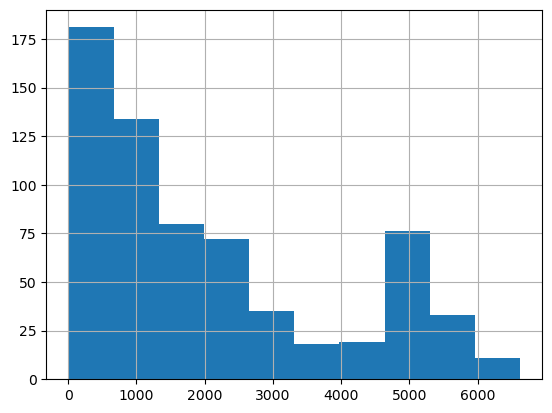

In [1]:
import os
os.chdir("/DeepenData/Repos/Flux_v0")
import warnings
warnings.filterwarnings("ignore")
import time
from data.mocks import planificacion_simulador

import releases.simv6_1 as sim


dataset = sim.DatasetTTP.desde_csv_atenciones("data/fonasa_monjitas.csv.gz")  # IdOficina=2)
un_dia = dataset.un_dia("2023-05-15").sort_values(by="FH_Emi", inplace=False)
skills = sim.obtener_skills(un_dia)
#########################
#---Ver tiempos de espera históricos---
#########################
un_dia.T_Esp.hist()

#planificacion = sim.plan_desde_skills(skills, inicio="08:00:00", porcentaje_actividad=1)


In [2]:

start_time = time.time()
hora_cierre = "15:30:00"
registros_atenciones, fila = sim.simv06(
                                        un_dia, hora_cierre, planificacion_simulador,  log_path = "dev/simulacion.log")
print(f"{len(registros_atenciones) = }, {len(fila) = }")
end_time = time.time()
print(f"tiempo total: {end_time - start_time:.1f} segundos")

registros_atenciones[registros_atenciones.espera != 0 ].sort_values('FH_Emi').head(10), registros_atenciones[registros_atenciones.espera != 0 ].sort_values('FH_Emi').tail(10)




len(registros_atenciones) = 659, len(fila) = 0
tiempo total: 3.8 segundos


(                     FH_Emi FH_AteIni IdSerie T_Ate IdEsc espera Priority
 270002  2023-05-15 08:41:27  08:43:11      14   381    10    120        2
 270003  2023-05-15 08:41:37  08:46:11      14   124    13    300        6
 270004  2023-05-15 08:41:50  08:48:11      14   305    12    420      NaN
 270006  2023-05-15 08:42:09  08:50:11      14   149    10    540        2
 270007  2023-05-15 08:42:21  08:53:11      14   312    10    660        2
 270008  2023-05-15 08:42:50  08:54:11      14   241    12    720      NaN
 270009  2023-05-15 08:43:13  08:56:11      14   334    11    780      NaN
 270010  2023-05-15 08:43:26  08:59:11      14   115    10    960        2
 270011  2023-05-15 08:43:38  08:59:11      14   246    12    960      NaN
 270022  2023-05-15 08:47:27  08:51:11      12   421     1    240      NaN,
                      FH_Emi FH_AteIni IdSerie T_Ate IdEsc espera Priority
 271095  2023-05-15 13:56:33  14:02:11      10    33     7    360      NaN
 271096  2023-05-15 13:5

In [3]:
registros_atenciones.to_csv("data/simulacion_mock.csv")

<Axes: >

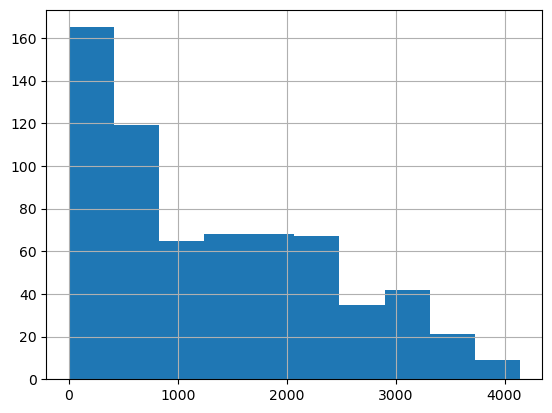

In [4]:


#########################
#---Ver tiempos de espera simulados---
#########################
registros_atenciones.espera.hist()

In [5]:

import matplotlib.pyplot as plt
for porcentaje in [0.95, 0.75, 0.5]:
    for k in planificacion.keys():
        # Solo hay un bloque horario, por eso el [0]
        planificacion[k][0]['propiedades']['porcentaje_actividad'] = porcentaje
        
        
    registros_atenciones, _ = sim.simv06(
                                        un_dia, hora_cierre, planificacion)
    
    (registros_atenciones.espera / 60/60).plot(kind='density', alpha=0.7, label=f'{k} - {porcentaje*100}%', linewidth=4)
plt.legend()
plt.xlim(0, None)
plt.xlabel('Horas de espera')

NameError: name 'planificacion' is not defined